In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hr-comma-sep-csv/HR_comma_sep.csv


In [2]:
df = pd.read_csv('/kaggle/input/hr-comma-sep-csv/HR_comma_sep.csv')



In [3]:
df.shape


(14999, 10)

In [4]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
df.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
df.isna().sum()


satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [8]:
df.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

<Axes: xlabel='left', ylabel='count'>

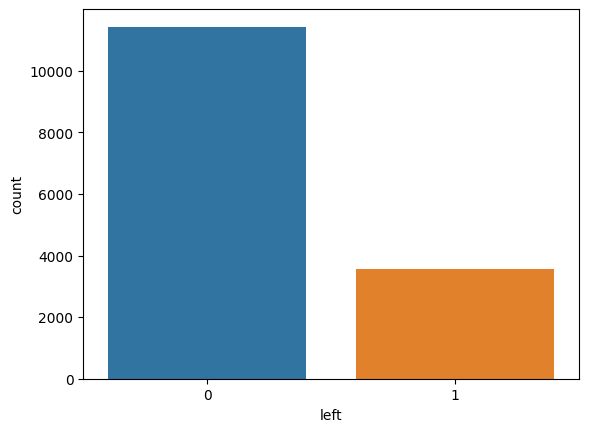

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(data=df,x='left')


<Axes: xlabel='promotion_last_5years', ylabel='count'>

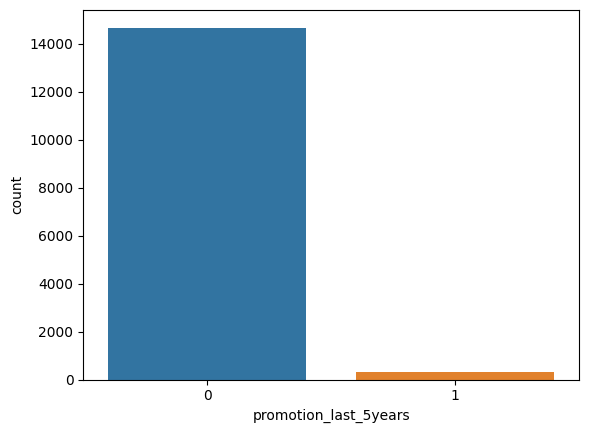

In [11]:
sns.countplot(data=df,x='promotion_last_5years')


In [12]:
df.corr(numeric_only=True)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


<Axes: >

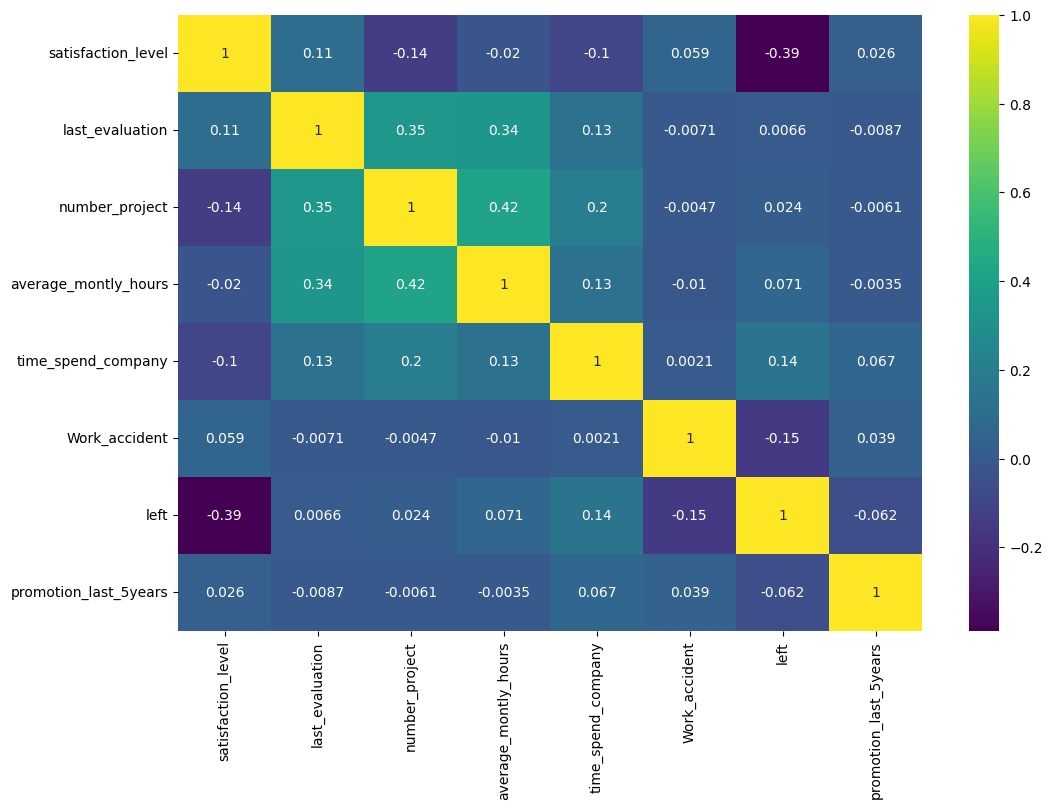

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True),cmap='viridis',annot=True)

In [15]:
corr_df  = pd.get_dummies(df[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary']]).corr()

In [16]:
corr_df


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_IT,Department_RandD,...,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.006373,0.006615,...,-0.012841,0.007172,0.005715,0.006919,0.004007,0.009185,-0.009345,0.029708,-0.047415,0.031367
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,0.001269,-0.005471,...,-0.009645,0.009662,-0.000311,-0.001989,-0.023031,0.017104,0.013742,-0.020628,0.005221,0.006191
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,0.003287,0.009703,...,-0.027356,0.009728,-0.023064,0.000829,-0.013388,0.000303,0.028596,-0.008726,-0.002504,0.007377
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,0.006967,-0.001177,...,-0.010783,0.000834,-0.008210,-0.005494,-0.001718,-0.002444,0.013638,-0.007101,-0.001050,0.005007
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,-0.006053,-0.021116,...,-0.022194,0.115436,0.012096,-0.003919,0.015150,-0.030111,-0.027991,0.039953,-0.040110,0.018299
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,-0.009293,0.017167,...,-0.015649,0.011242,0.011367,0.001246,-0.004955,0.012079,-0.006070,0.009040,-0.006813,0.001856
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.010925,-0.046596,...,0.028249,-0.046035,-0.000859,-0.011029,0.009923,0.010700,0.020076,-0.120929,0.134722,-0.068833
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,-0.038942,0.021268,...,-0.001531,0.128087,0.049253,-0.037288,0.012353,-0.035605,-0.035799,0.076756,-0.082832,0.040985
Department_IT,0.006373,0.001269,0.003287,0.006967,-0.006053,-0.009293,-0.010925,-0.038942,1.000000,-0.070240,...,-0.067949,-0.062500,-0.073524,-0.075503,-0.184302,-0.124705,-0.140484,-0.016089,0.005116,0.003775
Department_RandD,0.006615,-0.005471,0.009703,-0.001177,-0.021116,0.017167,-0.046596,0.021268,-0.070240,1.000000,...,-0.053570,-0.049274,-0.057965,-0.059525,-0.145300,-0.098315,-0.110755,-0.015115,-0.011887,0.020402


In [17]:
corr_df['left'].sort_values().iloc[:-1]


satisfaction_level       -0.388375
Work_accident            -0.154622
salary_high              -0.120929
salary_medium            -0.068833
promotion_last_5years    -0.061788
Department_RandD         -0.046596
Department_management    -0.046035
Department_product_mng   -0.011029
Department_IT            -0.010925
Department_marketing     -0.000859
last_evaluation           0.006567
Department_sales          0.009923
Department_support        0.010700
Department_accounting     0.015201
Department_technical      0.020076
number_project            0.023787
Department_hr             0.028249
average_montly_hours      0.071287
salary_low                0.134722
time_spend_company        0.144822
Name: left, dtype: float64

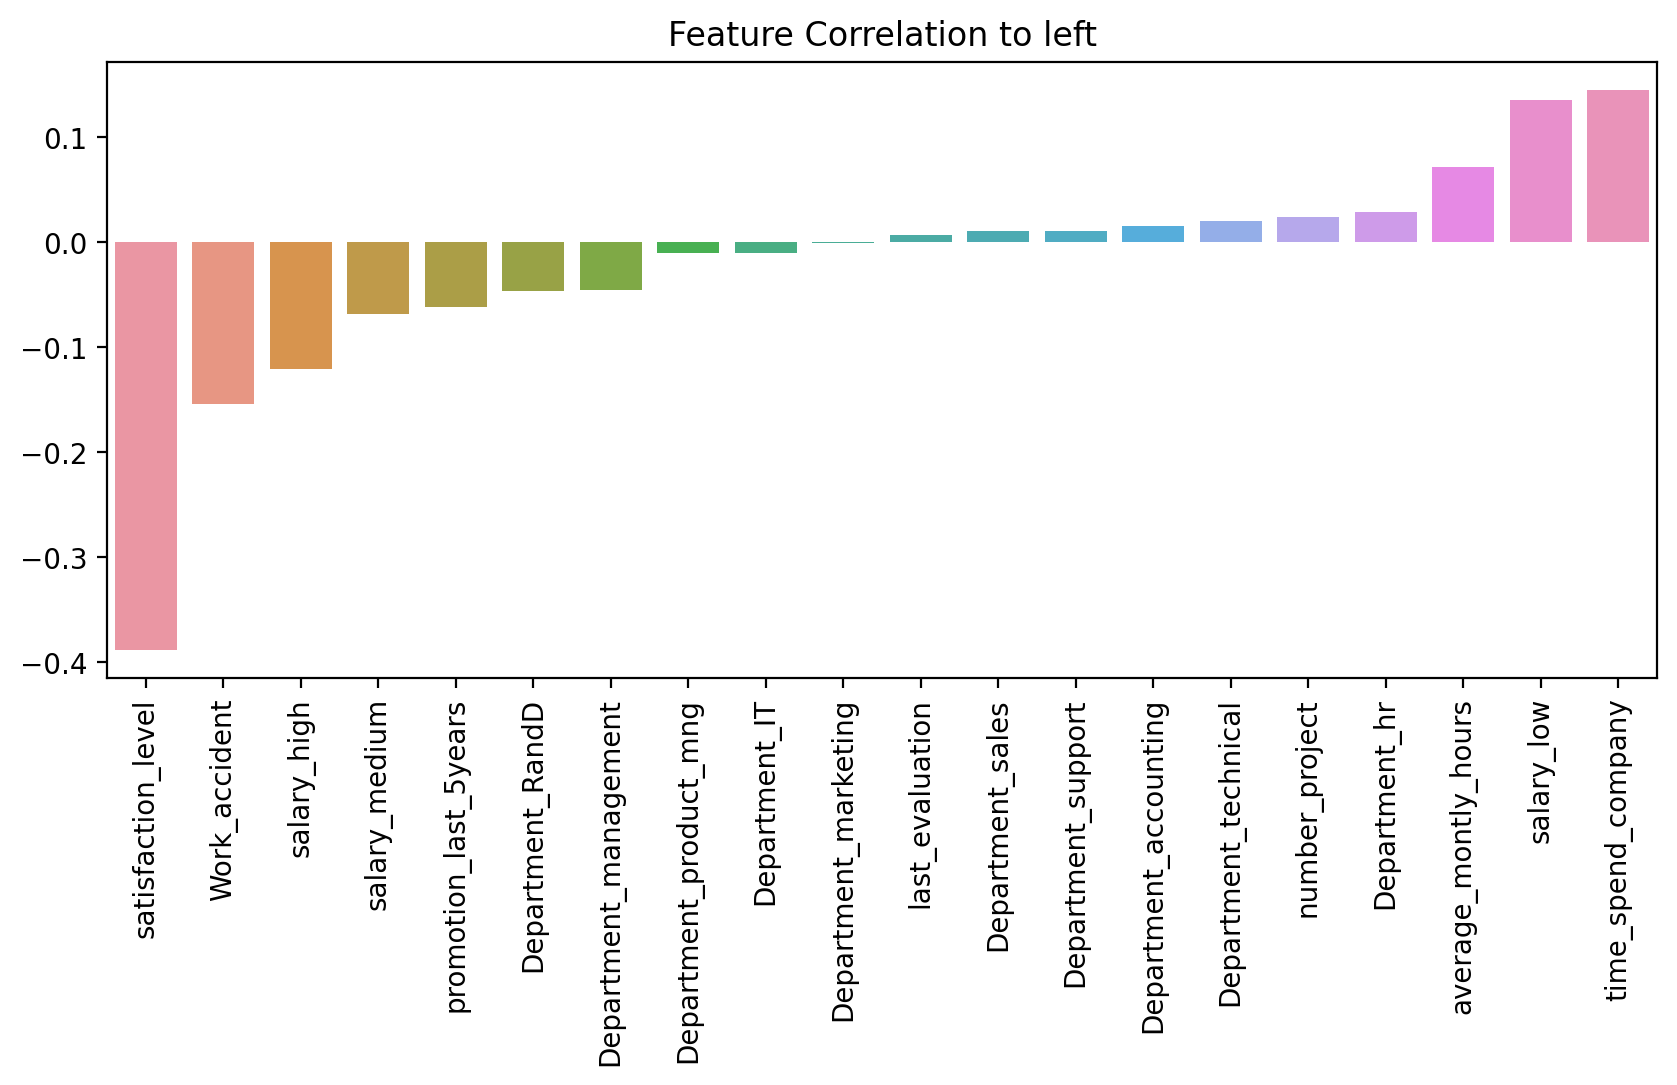

In [18]:
plt.figure(figsize=(10,4),dpi=200)
sns.barplot(x=corr_df['left'].sort_values().iloc[:-1].index,y=corr_df['left'].sort_values().iloc[:-1].values)
plt.title("Feature Correlation to left")
plt.xticks(rotation=90);

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='time_spend_company', ylabel='Count'>

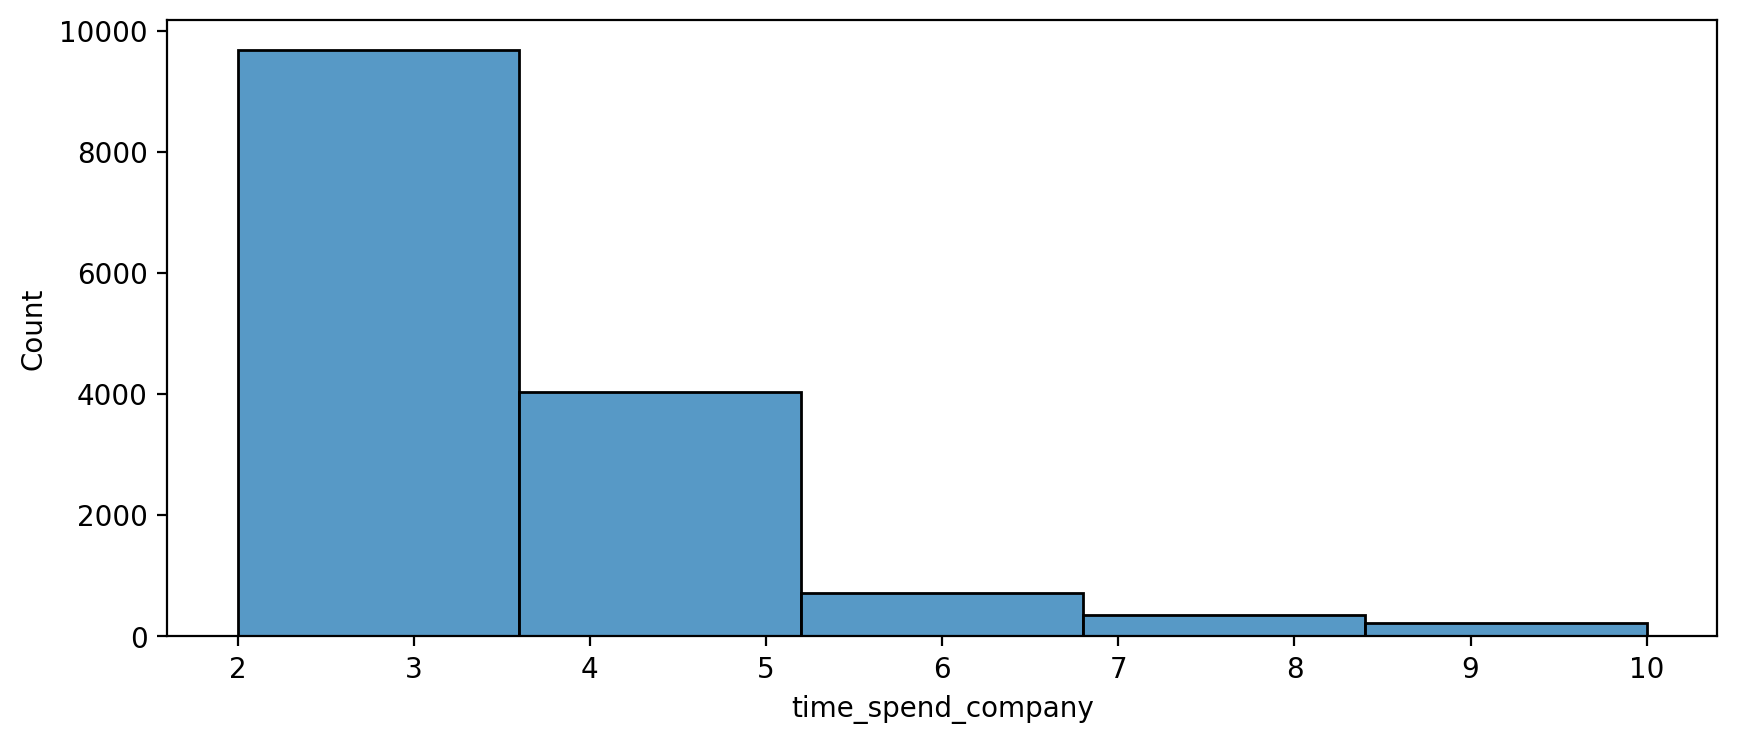

In [19]:
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(data=df,x='time_spend_company',bins=5)

In [20]:
# Group by 'Department' and calculate the count of employees who left
left_by_department = df.groupby('Department')['left'].sum()

# Display the result
print(left_by_department)

Department
IT              273
RandD           121
accounting      204
hr              215
management       91
marketing       203
product_mng     198
sales          1014
support         555
technical       697
Name: left, dtype: int64


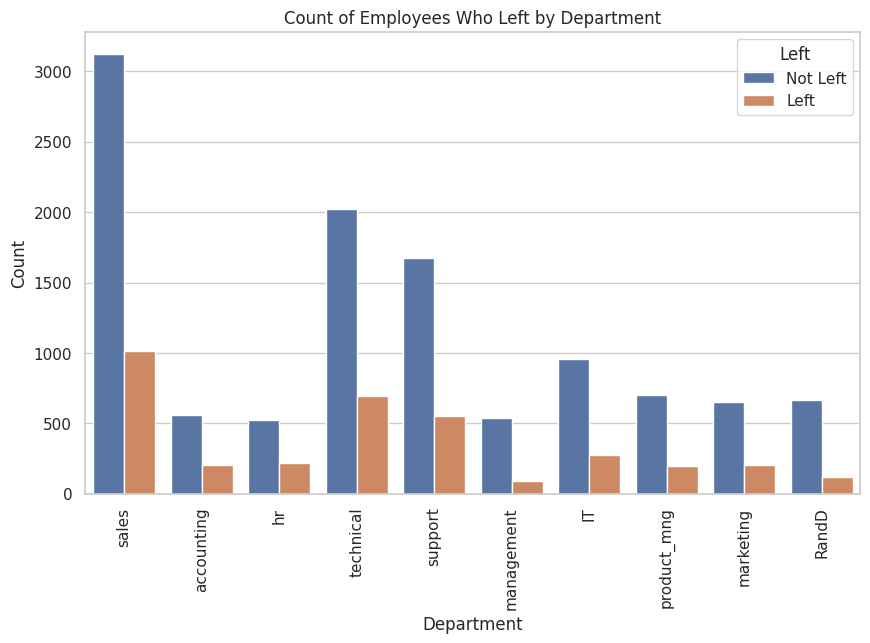

In [21]:
# Create a countplot for the 'Department' column
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
sns.set_theme(style="whitegrid")  # Optional: Set the theme

sns.countplot(x='Department', hue='left', data=df)
plt.title("Count of Employees Who Left by Department")
plt.xlabel("Department")
plt.ylabel("Count")
plt.legend(title="Left", labels=["Not Left", "Left"])
plt.xticks(rotation=90);


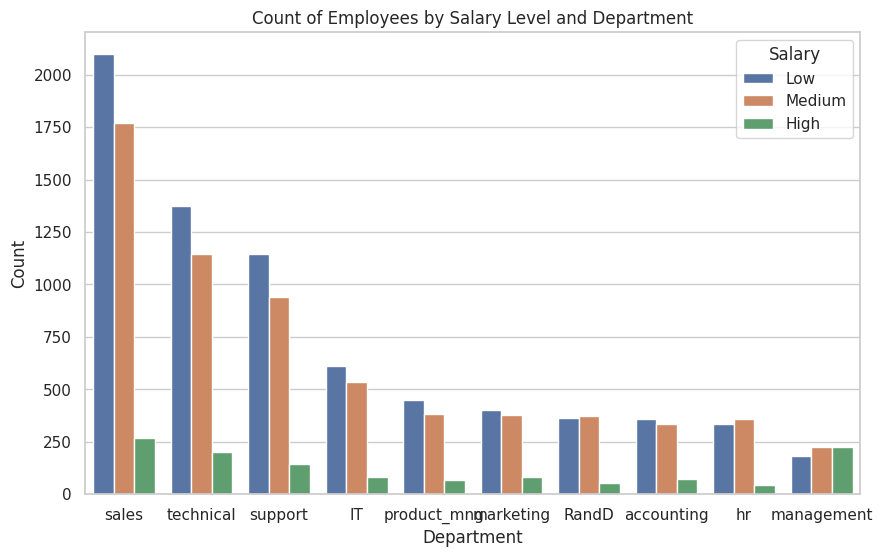

In [22]:
# Create a countplot for salary levels by department
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
sns.set_theme(style="whitegrid")  # Optional: Set the theme

sns.countplot(x='Department', hue='salary', data=df, order=df['Department'].value_counts().index)
plt.title("Count of Employees by Salary Level and Department")
plt.xlabel("Department")
plt.ylabel("Count")
plt.legend(title="Salary", labels=["Low", "Medium", "High"])

plt.show()


In [23]:
X = pd.get_dummies(df.drop('left',axis=1),drop_first=True)
y = df['left']

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)


In [26]:
scaler = StandardScaler()


In [27]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [28]:
from sklearn.linear_model import LogisticRegressionCV 


In [29]:
log_model = LogisticRegressionCV()


In [30]:
log_model.fit(scaled_X_train,y_train)


LogisticRegressionCV()

In [31]:
from sklearn.metrics import confusion_matrix,classification_report


In [32]:
y_pred = log_model.predict(scaled_X_test)


In [33]:
confusion_matrix(y_test,y_pred)


array([[1057,   79],
       [ 227,  137]])

In [34]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1136
           1       0.63      0.38      0.47       364

    accuracy                           0.80      1500
   macro avg       0.73      0.65      0.67      1500
weighted avg       0.78      0.80      0.78      1500



In [35]:
from sklearn.tree import DecisionTreeClassifier


In [36]:
from sklearn.model_selection import GridSearchCV


In [37]:
dt = DecisionTreeClassifier()


In [38]:
# Define hyperparameters and their possible values for grid search
param_grid = {
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]
}

In [39]:
# Create GridSearchCV object
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

In [40]:
grid_search.fit(scaled_X_train, y_train)


Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4]},
             scoring='accuracy', verbose=1)

In [41]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

Best hyperparameters: {'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [42]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=1, min_samples_split=2)


In [43]:
dt.fit(scaled_X_train,y_train)


DecisionTreeClassifier(max_depth=6)

In [46]:
preds_dt = dt.predict(scaled_X_test)


In [47]:
print(classification_report(y_test,preds_dt))


              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1136
           1       0.98      0.93      0.95       364

    accuracy                           0.98      1500
   macro avg       0.98      0.96      0.97      1500
weighted avg       0.98      0.98      0.98      1500



In [48]:
cf_matrix_dt = confusion_matrix(y_test,preds_dt)


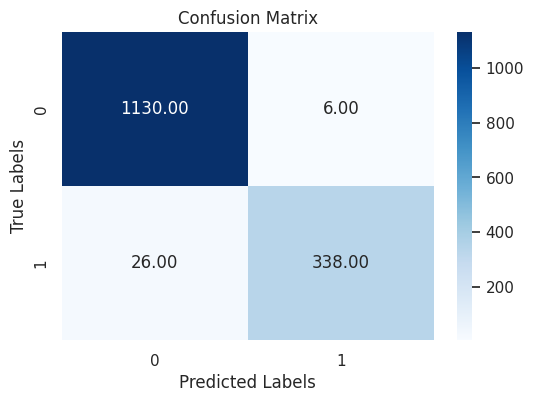

In [49]:
# Create a heatmap
plt.figure(figsize=(6, 4))  # Optional: Set the figure size
sns.set_theme(style="whitegrid")  # Optional: Set the theme

sns.heatmap(cf_matrix_dt, annot=True, fmt=".2f", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")

plt.show()

In [50]:
from sklearn.ensemble import RandomForestClassifier


In [51]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(scaled_X_train,y_train)
preds_rf = rf.predict(scaled_X_test)
print(classification_report(y_test,preds_rf))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1136
           1       1.00      0.98      0.99       364

    accuracy                           0.99      1500
   macro avg       1.00      0.99      0.99      1500
weighted avg       0.99      0.99      0.99      1500



In [52]:
cf_matrix_rf = confusion_matrix(y_test,preds_rf)


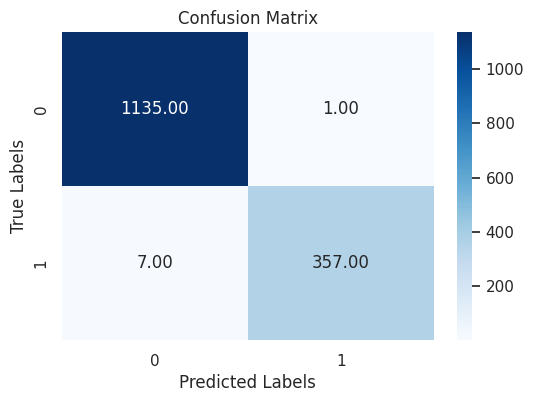

In [53]:
# Create a heatmap
plt.figure(figsize=(6, 4))  # Optional: Set the figure size
sns.set_theme(style="whitegrid")  # Optional: Set the theme

sns.heatmap(cf_matrix_rf, annot=True, fmt=".2f", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")

plt.show()